# Regression

In this project, I'll be going over the basics of linear regression (not to be confused with logistical regression, which is actually used for classification, not regression-confusing right?).

## The Basics of Linear Regression

Regression attempts to fit a line across a dataset given a slope and an intercept of the form $y = {a_1}{x_1}+{a_2}{x_2}+...{a_n}{x_n}+b$ for n features where:

* y = target
* x = single feature
* a's, b = parameters of model

In more formal terms, we can write this as:

\begin{equation*}
y = \left( \sum_{i=1}^n a_i x_i \right)  +b 
\end{equation*}

But how do we choose the a's and b? We do this by defining an error or loss function evaluting any line we come up with and how this line compares to the data provided. We then want to choose a line to minimize this error function. 

The most common error function is the Ordinary least squares (OLS) method. 
With OLS, we define a line, then compare it's points vs. the actual point, take the difference, square it (so negative values don't cancel positive value) then sum them all up. We could summarize this by saying OLS minimizes the sum of squares of the residuals. [Image courtesy of ARCGIS desktop]
<img src="./Images/OLS.png">

So to fit a linear regression model, we must specify a coefficient for each feature and the variable b. 
The Scikit-learn library performs this by taking in two arrays- the features array and a target array. Typically noted by uppercase X and lowercase y respectively. 

We'll experiment with this on our gapminder dataset taken from Datacamp authors Hugo Bowne-Anderson and Andreas Müller which gives demographic data for regions and tries to predict life expectancy. 

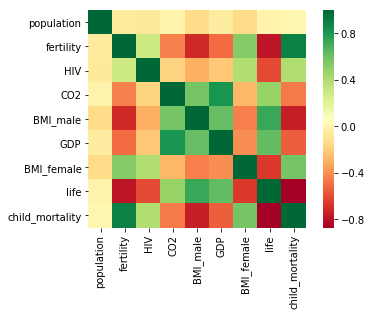

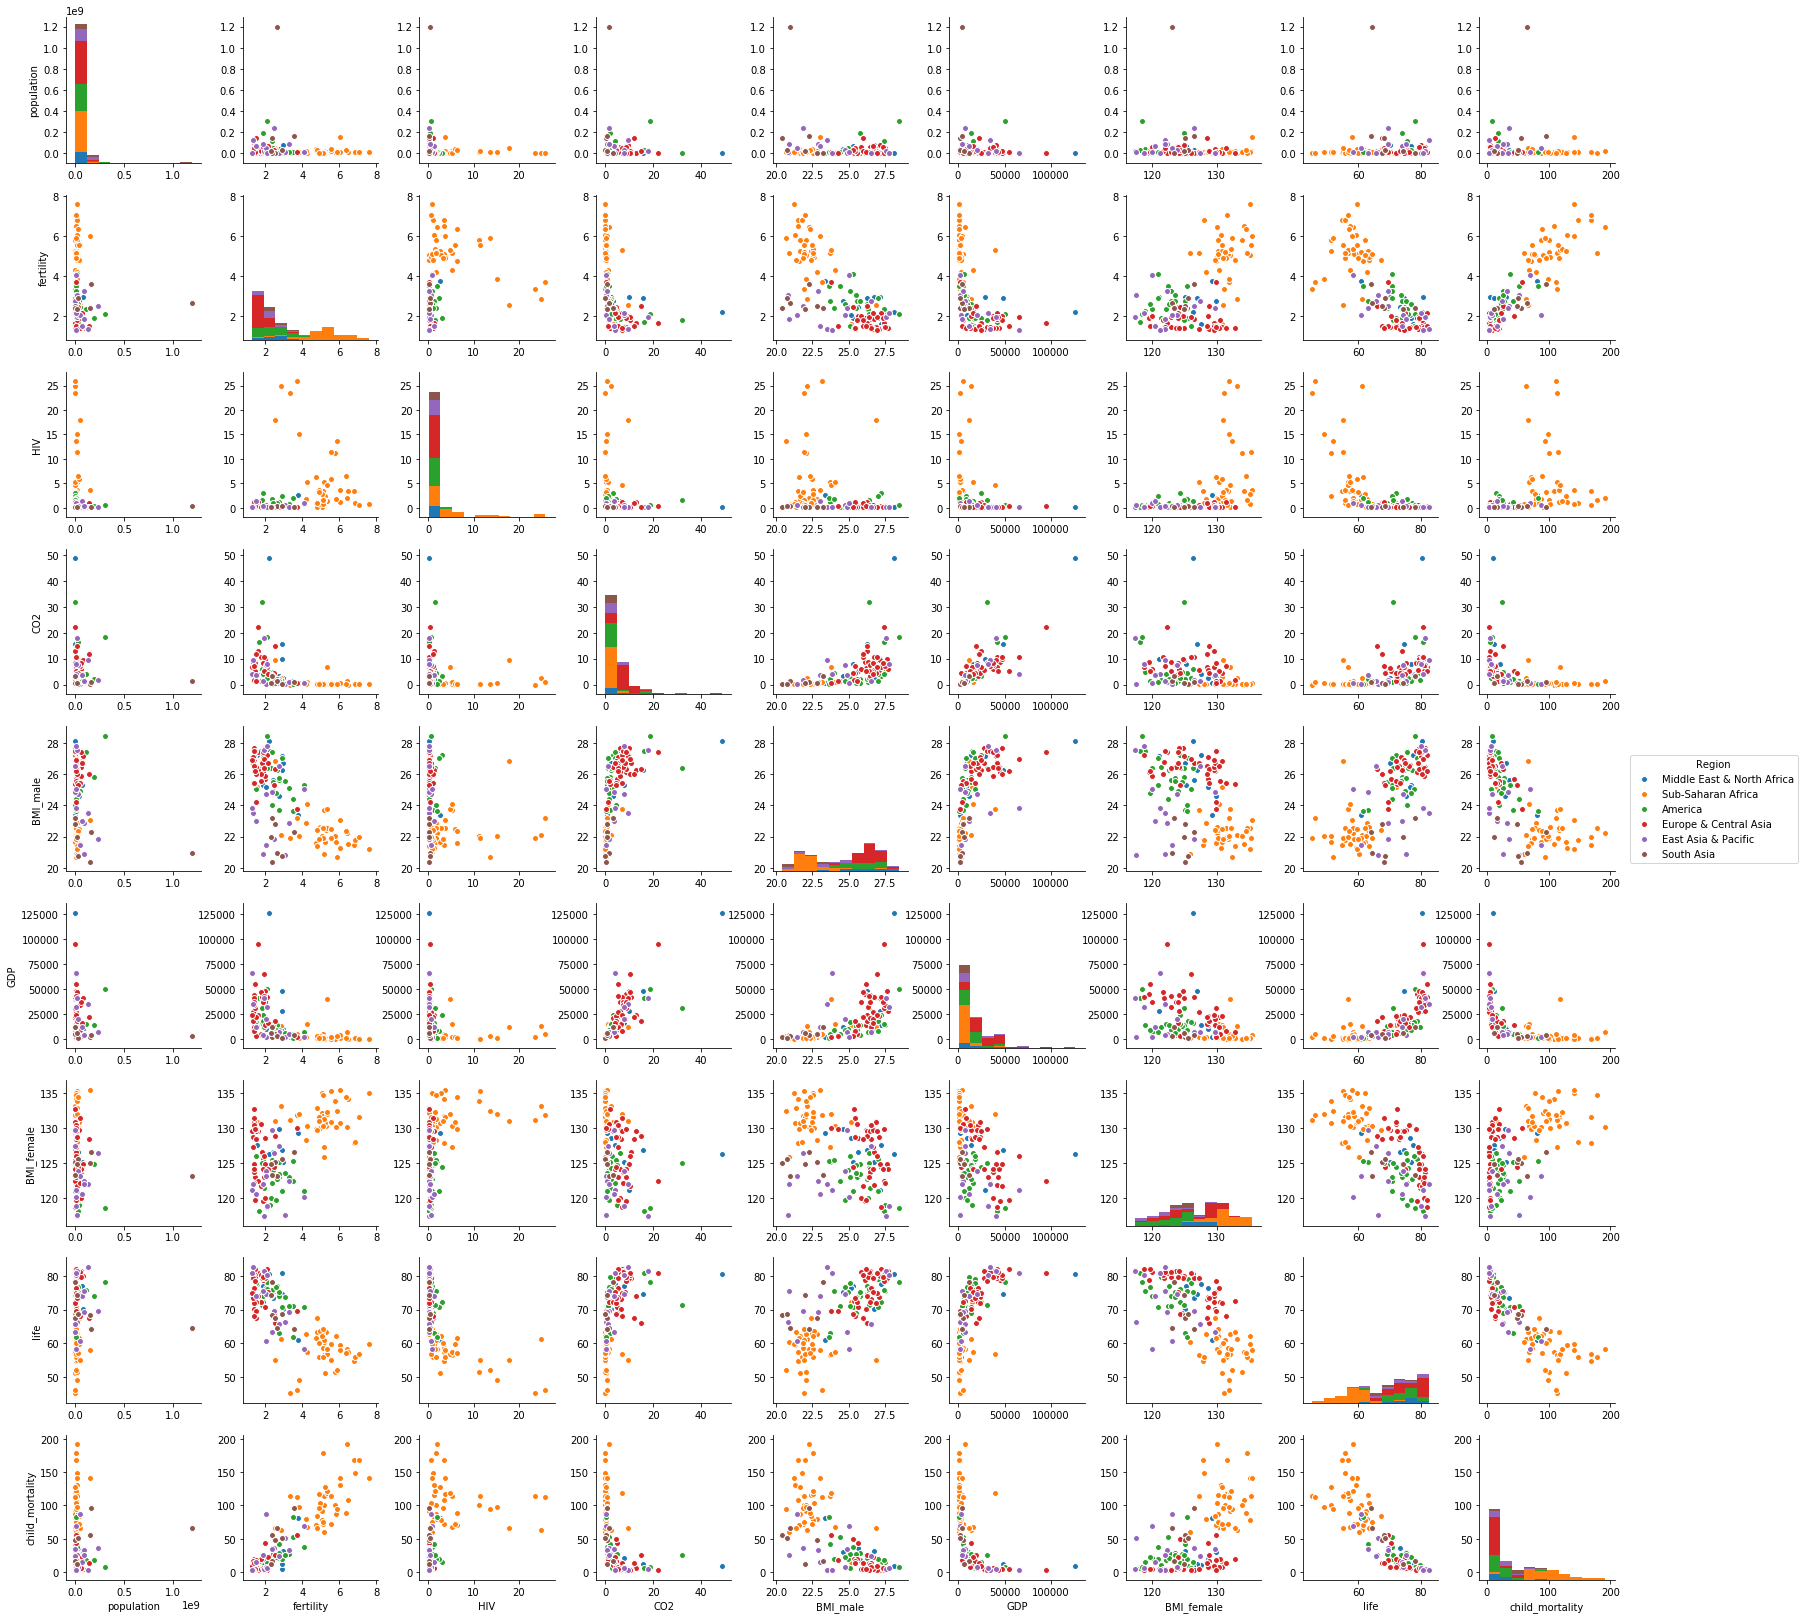

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(9), object(1)
memory usage: 10.9+ KB


population  fertility  HIV        CO2  BMI_male      GDP  BMI_female  life  \
0  34811059.0       2.73  0.1   3.328945  24.59620  12314.0    129.9049  75.3   
1  19842251.0       6.43  2.0   1.474353  22.25083   7103.0    130.1247  58.3   
2  40381860.0       2.24  0.5   4.785170  27.50170  14646.0    118.8915  75.5   
3   2975029.0       1.40  0.1   1.804106  25.35542   7383.0    132.8108  72.5   
4  21370348.0       1.96  0.1  18.016313  27.56373  41312.0    117.3755  81.5   

   child_mortality                      Region  
0             29.5  Middle East & North Africa  
1            192.0          Sub-Saharan Africa  
2             15.4                     America  
3             20.0       Europe & Central Asia  
4              5.2         East Asia & Pacific

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.show()
plt.figure()
sns.pairplot(df, hue="Region")
plt.show()

df.info()
df.describe()
df.head()

Just looking at our feature correlation heatmap, if we wanted to predict life expectancy, the strongest variable that correlates is from fertility and child mortality (both strongly negatively correlated). We could use all the features but let's keep it simple for now and only predict based on our strongest correlation, the child mortality variable. 

In [20]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame: df
df = pd.read_csv('./Datasets/gapminder.csv')

# Create arrays for features and target variable
y = df['life'].values
X = df[['child_mortality']].values
df=df.drop('Region',axis=1)

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1,1)
X = X.reshape(-1,1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139, 1)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=17760704)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

#.score will apply the R-squared metric
reg_all.score(X_test, y_test)


0.7489205200395288

Using the second most correlated variable, we got a R-score of .75, for regression problems, the closer an R-score is to 1, the better the predictions are to actual data. 
Let's do this again, but we'll try three different models and feature selections: 'fertility', 'fertility' & 'child mortality', and then all features except Region which is categorical, then compare their relative R-scores. 


In [59]:
X_fertility = df[['fertility']].values
X_top_two = df[['fertility','child_mortality']].values
X_all = df.drop('life',axis=1).values
X_s = [X_fertility, X_top_two, X_all]
print(X_fertility.shape)
print(X_top_two.shape)
print(X_all.shape)

(139, 1)
(139, 2)
(139, 8)


0.647302041517
Root Mean Squared Error: 5.261840713041834
0.744343131758
Root Mean Squared Error: 4.479865304326013
0.894089347986
Root Mean Squared Error: 2.8834076400581505


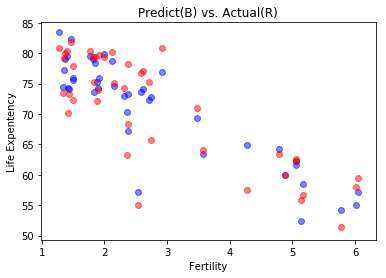

In [96]:
from sklearn.metrics import mean_squared_error

for X in X_s:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=17760704)
    reg_all = LinearRegression()
    reg_all.fit(X_train, y_train)
    y_pred = reg_all.predict(X_test)
    
    #.score will apply the R-squared metric
    print(reg_all.score(X_test, y_test))
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    print("Root Mean Squared Error: {}".format(rmse))
plt.figure()
plt.scatter(X_test[:,1:2],y_pred,c='Blue',alpha=.5)
plt.scatter(X_test[:,1:2],y_test,c='Red',alpha=.5)
plt.title('Predict(B) vs. Actual(R)')
plt.xlabel('Fertility')
plt.ylabel('Life Expentency')
plt.show()

Normally, we would run normalization and regularization on the dataset instead of just out of the box like this but even so, we ended up with reasonable numbers for our predictions. 
#### K-Fold cross-validation: better accuracy for small-datasets, computationally expensive for large
We also run up against the problem that how we split our data for our training and test set will decide the accuracy of the model and may not represent the model's ability to generalize. To combat this, we use a tool called cross-validation. 
The concept is to split your data into k-subsets, typically k is 5, 10 or larger. You then separate one of the subsets for testing, then fit the model to the remaining parts and score the model based on this one scenario. Then take the next single subset and continue until all the data has been used for test and training sets. This method is better than single splitting for assessing a model's accuracy. 
[Image courtesy of Wikipedia]
<img src="./Images/K-fold_cross_validation_EN.jpg">

<h4 align="center">4-fold Cross-Validation</h3>



In [69]:
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
X_fertility = df[['fertility']].values
cv_results = cross_val_score(reg, X_fertility, y, cv=5)
print(cv_results)
np.mean(cv_results)


[ 0.71001079  0.75007717  0.55271526  0.547501    0.52410561]


0.61688196444251187

One important aspect to note on cross-validation is for large datasets, it can be very computationally expensive to perform. However, with larger datasets, you can be reasonably confident any statisitical anomolies will average out and cross-validation isn't as necesary to get accurate performance metrics. Next we'll see how different number of folds can take different amounts of time for our models to train.

In [70]:
# Import necessary modules

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv=10)
print(np.mean(cvscores_10))

%timeit cross_val_score(reg, X, y, cv = 3)

%timeit cross_val_score(reg, X, y, cv = 10)

0.871871278262
0.843612862013
4.45 ms ± 401 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
12.9 ms ± 429 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Regularization
The remainder of this project we'll be discussing regularization. Regularization is a process of penalizing a model for putting too much emphasis on certain input features and disregarding all others. During normal fitting, this would lead to much larger coefficients on the features of interest while the rest are pushed to obscurity. 
Remember, Linear Regression minimizes a loss function by choosing coefficients for each feature variable. If the model chooses overly large coefficients for certain features, this will lead to overfitting and too much bias towards individual parts and won't approach the problem in a holistic fashion. To penalize this, we add regularization to discourage very large coeffients in the models. Think of it as trying to combat prejudice in the model. 

## Ridge regression

Our first foray into regression will use Ridge Regression, recall our normal loss functino is the ordinary least squares method. With Ridge regression, we add another term to take into account the size of the coefficients added.

Ordiniary Least Squares: 
\begin{equation*}
y = \left( \sum_{i=1}^n a_i x_i \right)  +b 
\end{equation*}

Ridge Regression:
\begin{equation*}
y = \left( \sum_{i=1}^n a_i x_i \right)  +α \left( \sum_{i=1}^n a_i^2 \right) +b
\end{equation*}

Here, α is a parameter we need to choose similar to how we need to pick k in the K nearest neighbors algorithm. Alpha controls the model complexity, ranging from 0 which is pure OLS, very high alphas though can lead to underfitting. 

In [73]:
##Ridge regression in scikit-learn

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=17760704)
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.8893595404640583

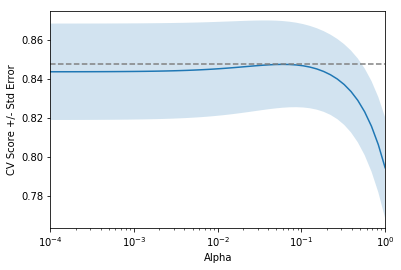

Max Cross-Validation score at alpha = 0.05963623316594643


In [95]:
#Choosing an appropriate alpha 

def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()
    
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)
print("Max Cross-Validation score at alpha = {}".format(alpha_space[ridge_scores==(np.max(ridge_scores))][0]))

#Should choose an alpha of about 0.06

## Lasso regression
Similar to Ridge Regression, we can also add regularization by taking the sum of the absolute values of the coefficients instead of squarring them as we do with Ridge Regression. These two methods are commonly abbreviated L1(absolute value) and L2(squared value) and can be combined into ratios between the two. This [link](http://www.chioka.in/differences-between-l1-and-l2-as-loss-function-and-regularization) has more information on the uses for both. 

Ordiniary Least Squares: 
\begin{equation*}
y = \left( \sum_{i=1}^n a_i x_i \right)  +b 
\end{equation*}

Ridge Regression:
\begin{equation*}
y = \left( \sum_{i=1}^n a_i x_i \right)  +α \left( \sum_{i=1}^n a_i^2 \right) +b
\end{equation*}

Lasso Regression:
\begin{equation*}
y = \left( \sum_{i=1}^n a_i*x_i \right)  +α \left( \sum_{i=1}^n |a_i| \right) +b
\end{equation*}

In [74]:
##Lasso regression in scikit-learn

from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=17760704)
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

0.83599141698220059

### Lasso regression for feature selection

Lasso regressino can be used to select important features of a dataset, we do this by plotting the coefficients of each of the features and showing how the lasso regression shrinks the coefficients of less important features to exactly 0.

[-0.         -0.         -0.          0.          0.          0.         -0.
 -0.07087587]


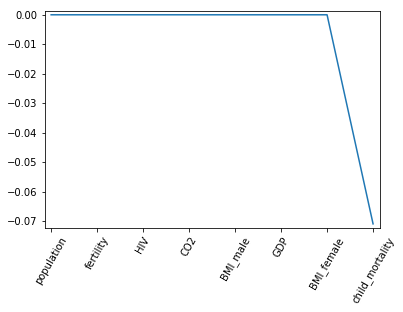

In [85]:
##Lasso for feature selection in scikit-learn

# Import Lasso
from sklearn.linear_model import Lasso
df_columns = df.drop('life',axis=1).columns

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

# Final Thoughts

In this project, we showed how to split our datasets into train/test sets as well as cross-validate then perform linear regression. We also learned how to use two methods of regularization to better generalize our models Lasso and Ridge regularization. 